In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '/data200T/stereoseq/YuF_BGI/'

In [4]:
from bin import load_bgi

In [5]:
fdata = load_bgi.load_bin(data_dir + 'COAD_H_003_2022_x/results/FP200000572BR_E1.tissue.gem.gz', 200, 'SS200000102TR_A1')

In [57]:
# fdata.write_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/FP200000572BR_E1.tissue.gem.h5ad')
fdata = sc.read_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/FP200000572BR_E1.tissue.gem.h5ad')

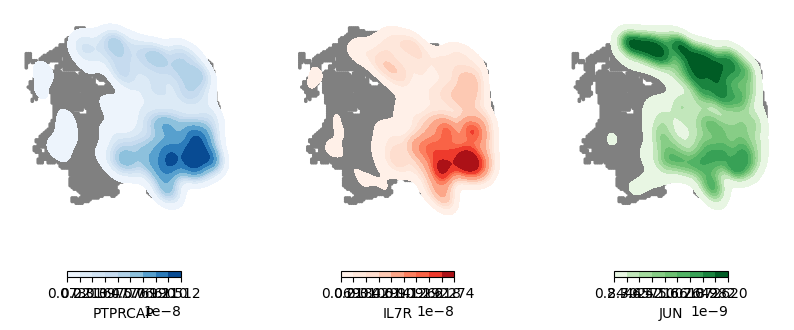

In [58]:
plot_data = fdata[fdata[:, ['CD8A', 'CD8B', 'CD3D', 'CD3E', 'CD3G']].X.toarray().sum(axis=1) > 0, :]

_, ax = plt.subplots(1, 3, figsize=(10, 4))
gene_1 = 'PTPRCAP'
gene_2 = 'IL7R'
gene_3 = 'JUN'
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[0], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[1], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[2], marker='o')

kdeplot1 = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
cbar = plt.colorbar(kdeplot1.collections[1], ax=ax[0], orientation='horizontal', label=gene_1, cmap='Blues', shrink=0.5)
cbar.ax.tick_params(labelsize=10)

kdeplot2 = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(), 
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot2.collections[1], ax=ax[1], orientation='horizontal', label=gene_2, cmap='Reds', shrink=0.5)
cbar.ax.tick_params(labelsize=10)

kdeplot3 = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_3].X.toarray().flatten(),
            cmap='Greens', ax=ax[2], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot3.collections[1], ax=ax[2], orientation='horizontal', label=gene_3, cmap='Greens', shrink=0.5)
cbar.ax.tick_params(labelsize=10)

sns.despine(left=True, bottom=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240702-Exclusive/plots/spatial_03.pdf', bbox_inches='tight')
plt.show()

In [20]:
list_1 = ['Cdkn2d', 'Fos', 'Klf2', 'Klf2', 'Npm1', 'Ccl4', 'Klf2', 'S100a11', 'Ccr7', 'Lypla1', 'Sell', 'Xist', 'Jun', 'Lgals3', 'Ablim1', 'Ablim1', 'Ablim1', 'Rasgrp2', 'Gimap5', 'Ablim1', 'Dgka', 'Klf2', 'Klf2', 'Gzmb', 'Klf2', 'Gapdh', 'Xist', 'Ccl4', 'Klf2', 'Lgals3', 'Trac', 'Rasgrp2', 'Tubb4b', 'Trac']
list_2 = ['Itm2c', 'Gng5', 'Capg', 'Tgif1', 'Ccl5', 'Sptbn1', 'Casp3', 'Tcf7', 'Actn4', 'Trac', 'Actn4', 'Ywhaq', 'Ptprcap', 'Tcf7', 'Ccl5', 'Ccl4', 'S100a4', 'Capg', 'Jpt1', 'Ccl4', 'Lgals1', 'Syngr2', 'Fkbp4', 'Foxp1', 'Lgals3', 'Sell', 'Ybx1', 'Foxp1', 'Prdx3', 'Sell', 'Sms', 'Lgals3', 'Sell', 'Gapdh']

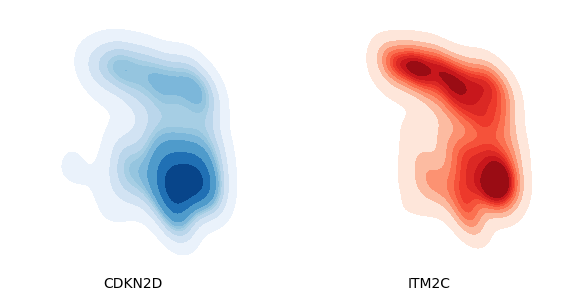

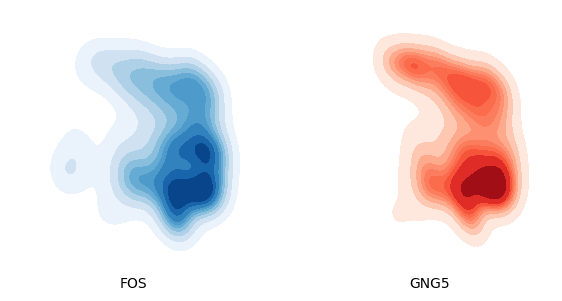

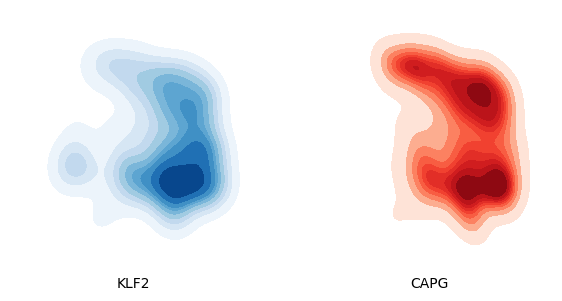

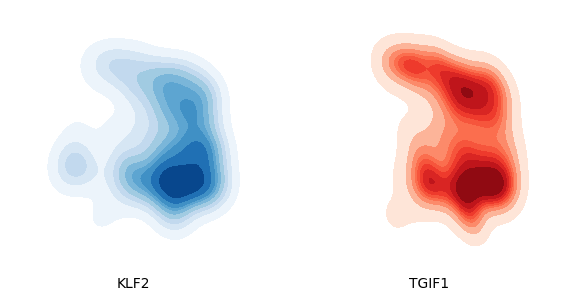

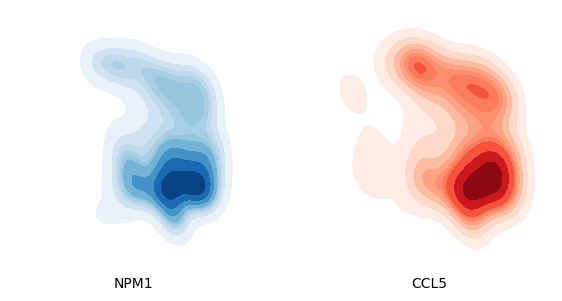

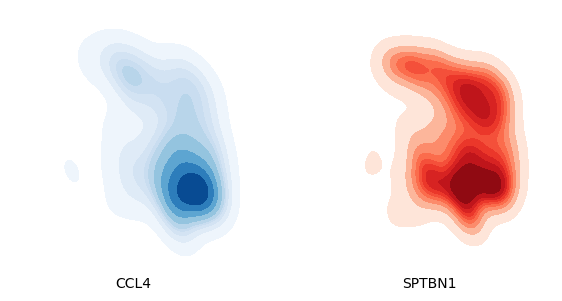

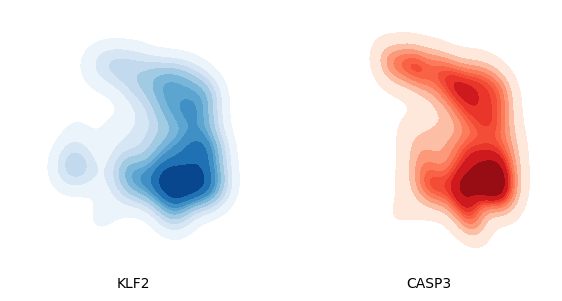

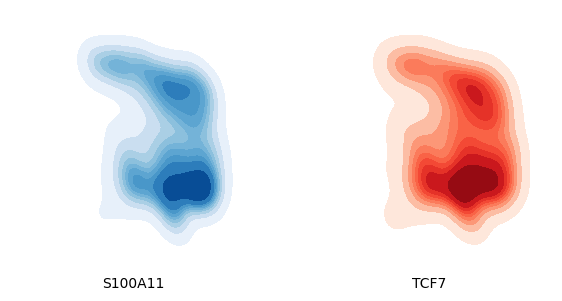

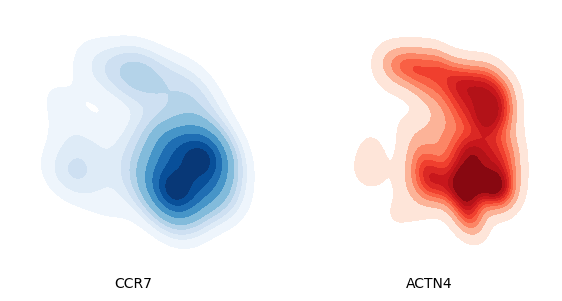

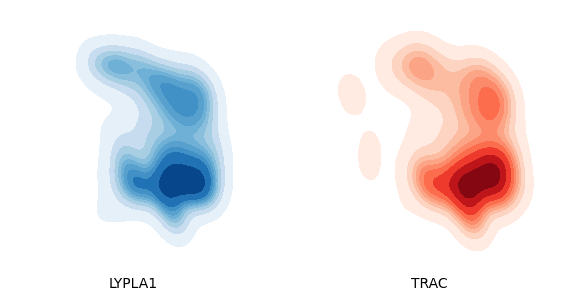

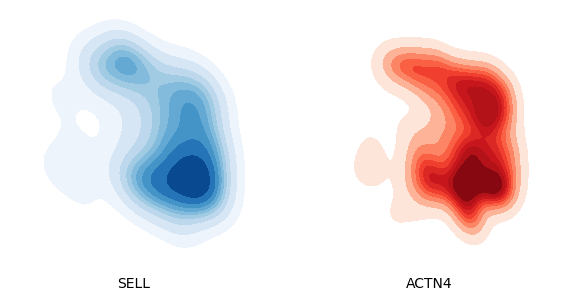

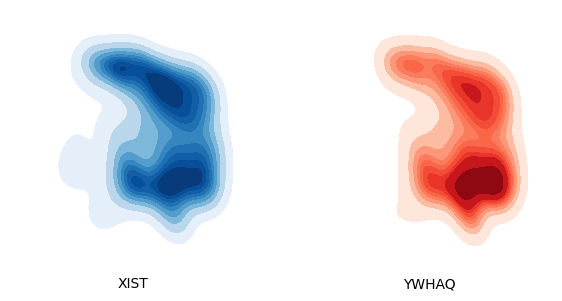

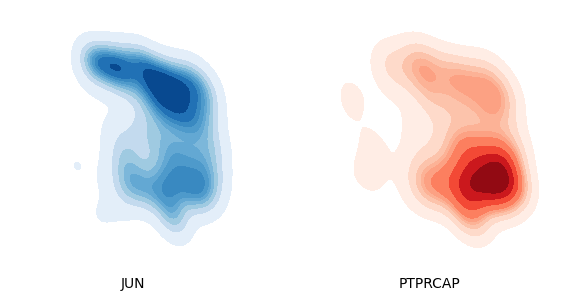

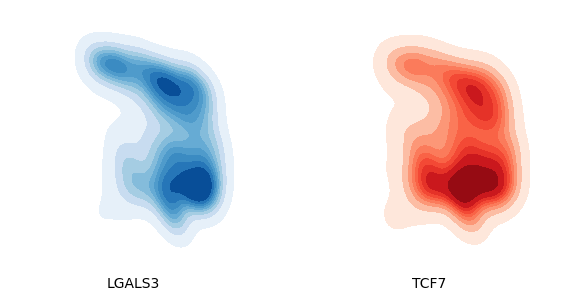

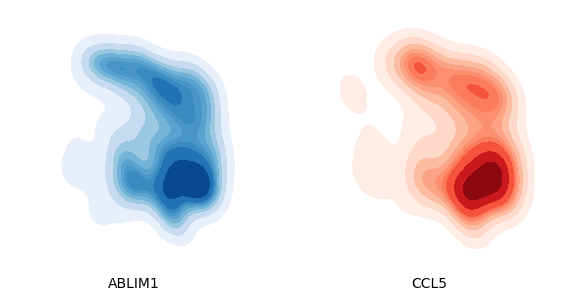

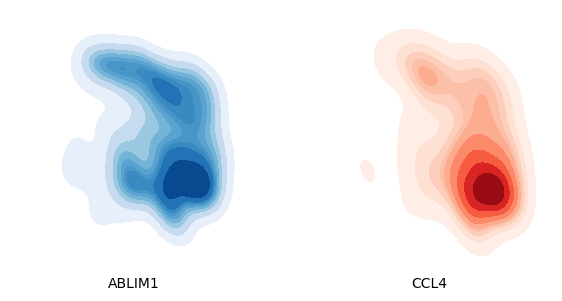

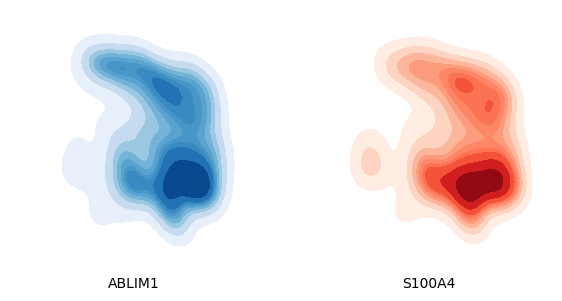

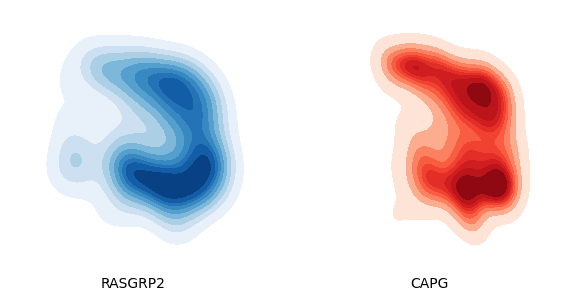

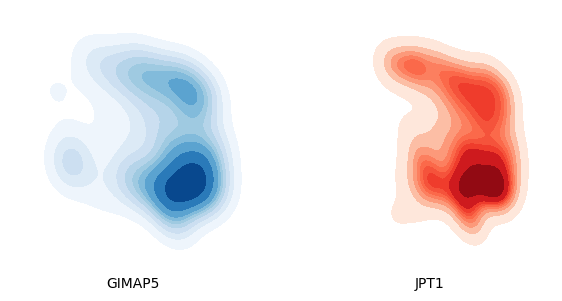

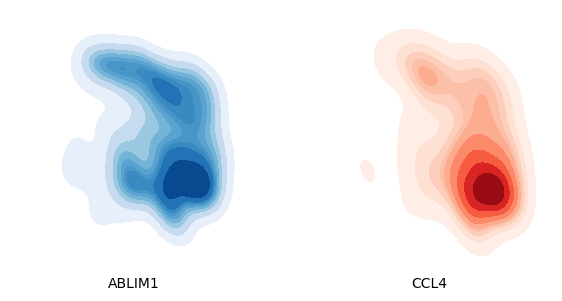

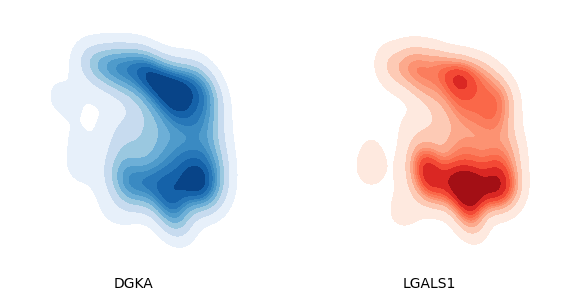

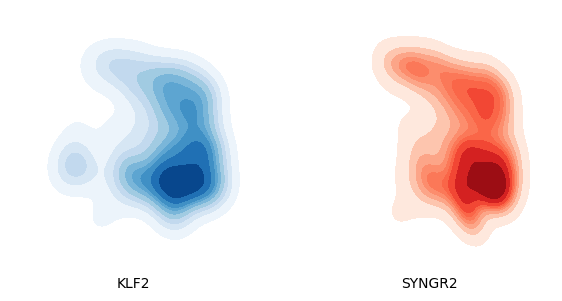

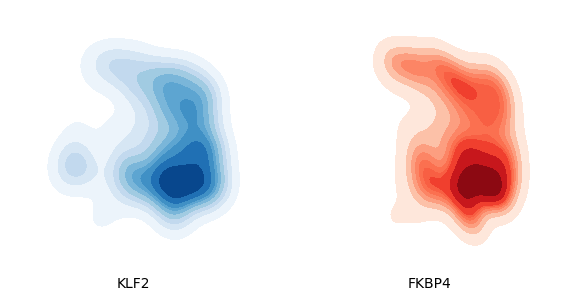

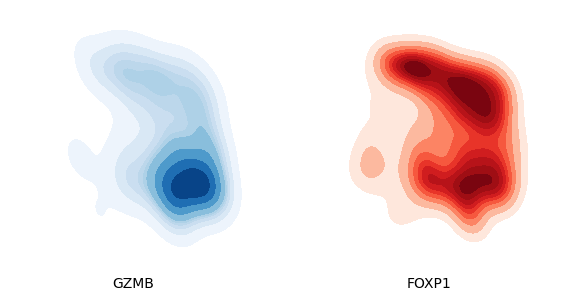

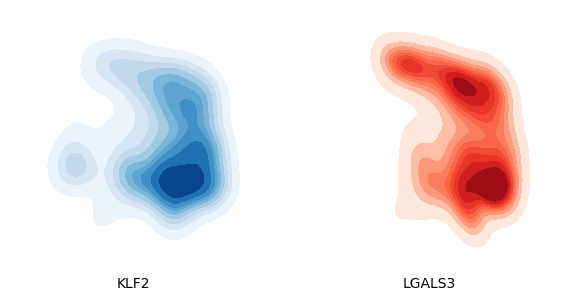

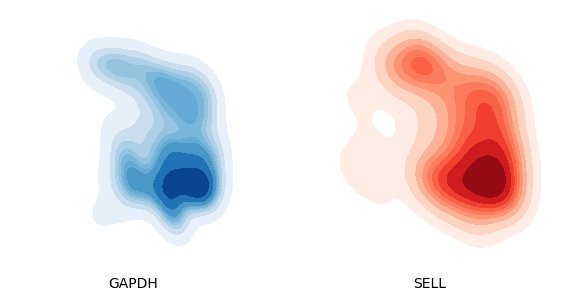

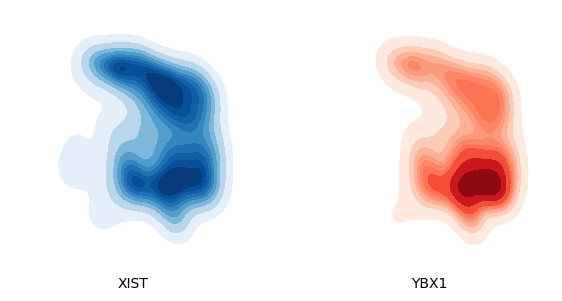

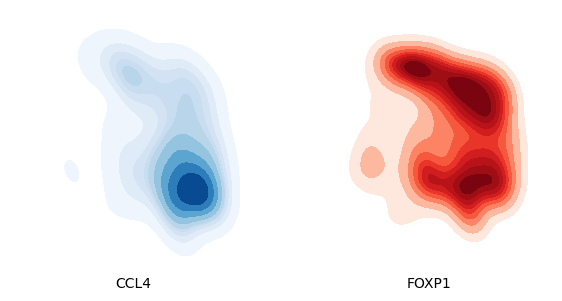

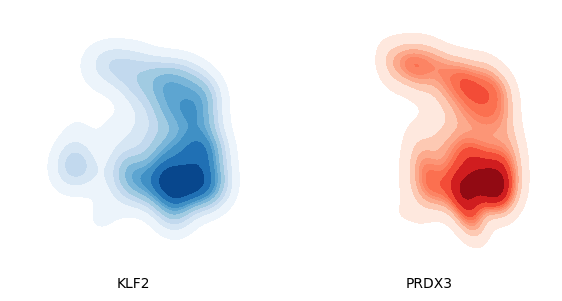

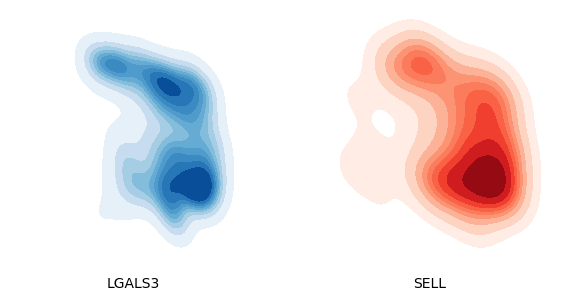

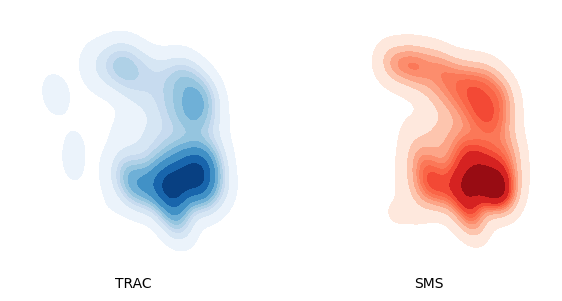

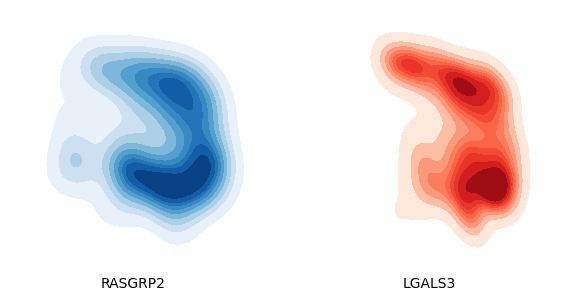

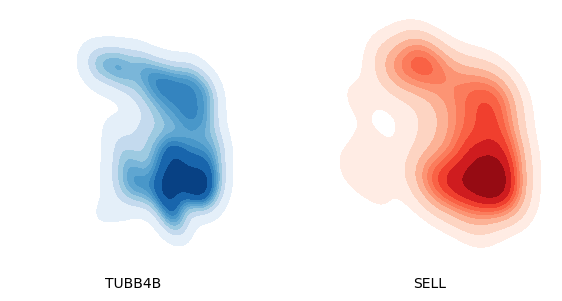

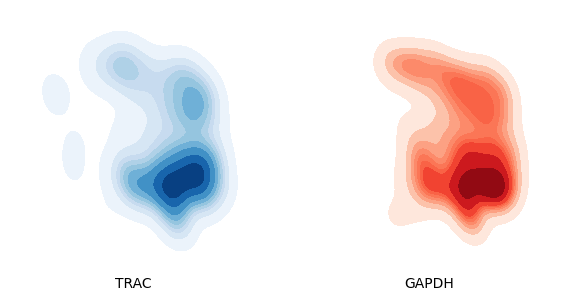

In [27]:
plot_data = fdata[fdata[:, ['CD8A', 'CD8B', 'CD3D', 'CD3E', 'CD3G']].X.toarray().sum(axis=1) > 0, :]
for gene_1, gene_2 in zip(list_1, list_2):
    _, ax = plt.subplots(1, 2, figsize=(7, 3.4))
    gene_1 = gene_1.upper()
    gene_2 = gene_2.upper()
    # sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
    #             s=3, c=plot_data[:, gene_1].X.toarray().flatten(),
    #             alpha=1, cmap='Greens', ax=ax[0], marker='s')
    # sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
    #                 s=3, c=plot_data[:, gene_2].X.toarray().flatten(),
    #                 alpha=1, cmap='Reds', ax=ax[1], marker='s')
    sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                weights=plot_data[:, gene_1].X.toarray().flatten(),
                cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=1)
    sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                weights=plot_data[:, gene_2].X.toarray().flatten(),
                cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=1)
    sns.despine(left=True, bottom=True)
    ax[0].set_xlabel(gene_1)
    ax[1].set_xlabel(gene_2)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()

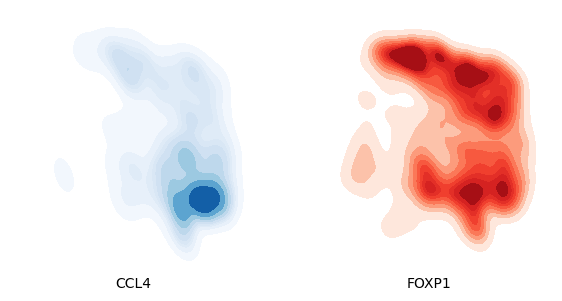

In [33]:
_, ax = plt.subplots(1, 2, figsize=(7, 3.4))
gene_1 = 'CCL4'
gene_2 = 'FOXP1'
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#             s=3, c=plot_data[:, gene_1].X.toarray().flatten(),
#             alpha=1, cmap='Greens', ax=ax[0], marker='s')
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=3, c=plot_data[:, gene_2].X.toarray().flatten(),
#                 alpha=1, cmap='Reds', ax=ax[1], marker='s')
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

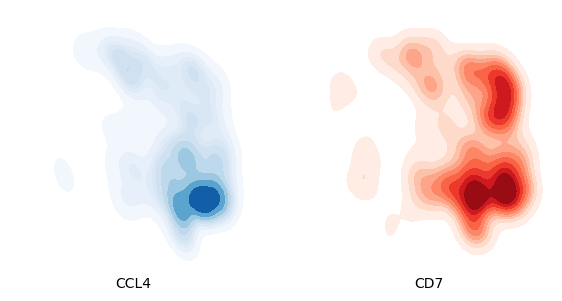

In [31]:
_, ax = plt.subplots(1, 2, figsize=(7, 3.4))
gene_1 = 'CCL4'
gene_2 = 'CD7'
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#             s=3, c=plot_data[:, gene_1].X.toarray().flatten(),
#             alpha=1, cmap='Greens', ax=ax[0], marker='s')
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=3, c=plot_data[:, gene_2].X.toarray().flatten(),
#                 alpha=1, cmap='Reds', ax=ax[1], marker='s')
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

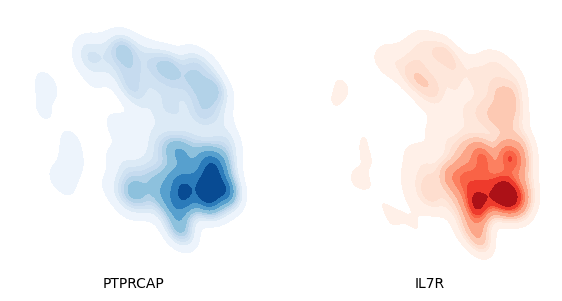

In [32]:
_, ax = plt.subplots(1, 2, figsize=(7, 3.4))
gene_1 = 'PTPRCAP'
gene_2 = 'IL7R'
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#             s=3, c=plot_data[:, gene_1].X.toarray().flatten(),
#             alpha=1, cmap='Greens', ax=ax[0], marker='s')
# sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
#                 s=3, c=plot_data[:, gene_2].X.toarray().flatten(),
#                 alpha=1, cmap='Reds', ax=ax[1], marker='s')
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

In [55]:
# fdata = load_bgi.load_bin(data_dir + 'COAD_H_009_2022_x/results/SS200000111TR_E2.tissue.gem.gz', 200, 'SS200000111TR_E2')
# fdata.write_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/SS200000111TR_E2.gem.h5ad')
fdata = sc.read_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/SS200000111TR_E2.gem.h5ad')

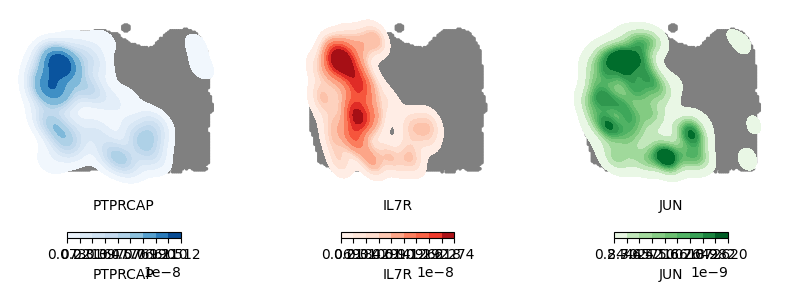

In [56]:
plot_data = fdata[fdata[:, ['CD8A', 'CD8B', 'CD3D', 'CD3E', 'CD3G']].X.toarray().sum(axis=1) > 0, :]

_, ax = plt.subplots(1, 3, figsize=(10, 3.4))
gene_1 = 'PTPRCAP'
gene_2 = 'IL7R'
gene_3 = 'JUN'
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[0], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[1], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[2], marker='o')

sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot1.collections[1], ax=ax[0], orientation='horizontal', label=gene_1, cmap='Blues', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot2.collections[1], ax=ax[1], orientation='horizontal', label=gene_2, cmap='Reds', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_3].X.toarray().flatten(),
            cmap='Greens', ax=ax[2], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot3.collections[1], ax=ax[2], orientation='horizontal', label=gene_3, cmap='Greens', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[2].set_xlabel(gene_3)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240702-Exclusive/plots/spatial_09.pdf', bbox_inches='tight')
plt.show()

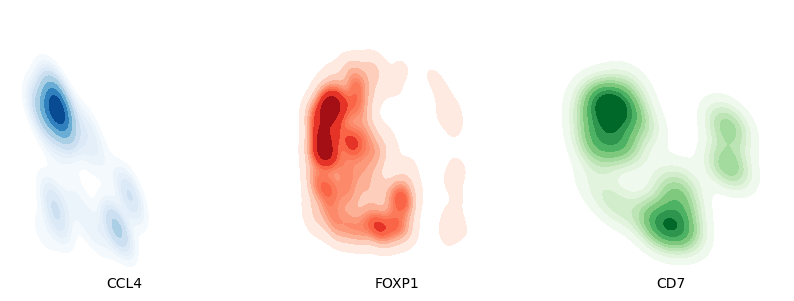

In [40]:
plot_data = fdata[fdata[:, ['CD8A', 'CD8B', 'CD3D', 'CD3E', 'CD3G']].X.toarray().sum(axis=1) > 0, :]

_, ax = plt.subplots(1, 3, figsize=(10, 3.4))
gene_1 = 'CCL4'
gene_2 = 'FOXP1'
gene_3 = 'CD7'
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot1.collections[1], ax=ax[0], orientation='horizontal', label=gene_1, cmap='Blues', shrink=0.5)   
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot2.collections[1], ax=ax[1], orientation='horizontal', label=gene_2, cmap='Reds', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_3].X.toarray().flatten(),
            cmap='Greens', ax=ax[2], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot3.collections[1], ax=ax[2], orientation='horizontal', label=gene_3, cmap='Greens', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[2].set_xlabel(gene_3)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()

In [6]:
# fdata = load_bgi.load_bin(data_dir + 'COAD_H_005_2022_x/results/SS200000104TR_A3.tissue.gem.gz', 200, 'SS200000104TR_A3')
# fdata.write_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/SS200000104TR_A3.gem.h5ad')
fdata = sc.read_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/SS200000104TR_A3.gem.h5ad')

In [13]:
fdata.obsm['spatial'][:, 0].max() - fdata.obsm['spatial'][:, 0].min()

16341

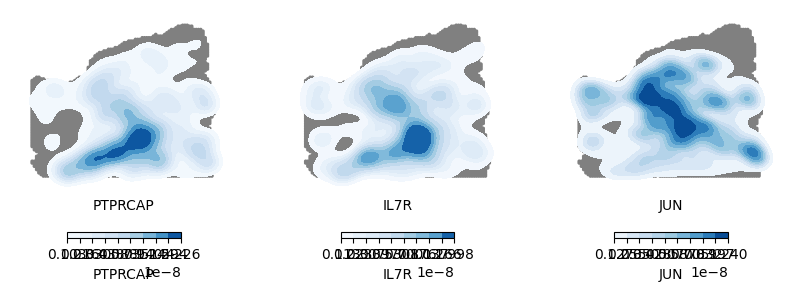

In [9]:
plot_data = fdata[fdata[:, ['CD8A', 'CD8B', 'CD3D', 'CD3E', 'CD3G']].X.toarray().sum(axis=1) > 0, :]

_, ax = plt.subplots(1, 3, figsize=(10, 3.4))
gene_1 = 'PTPRCAP'
gene_2 = 'IL7R'
gene_3 = 'JUN'

sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[0], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[1], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[2], marker='o')

kdeplot1 = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
cbar = plt.colorbar(kdeplot1.collections[1], ax=ax[0], orientation='horizontal', label=gene_1, cmap='Blues', shrink=0.5)   
cbar.ax.tick_params(labelsize=10)
kdeplot2 = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Blues', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
cbar = plt.colorbar(kdeplot2.collections[1], ax=ax[1], orientation='horizontal', label=gene_2, cmap='Blues', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
kdeplot3 = sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_3].X.toarray().flatten(),
            cmap='Blues', ax=ax[2], alpha=1, fill=True, bw_adjust=0.6)
cbar = plt.colorbar(kdeplot3.collections[1], ax=ax[2], orientation='horizontal', label=gene_3, cmap='Blues', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[2].set_xlabel(gene_3)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240702-Exclusive/plots/spatial_05.pdf', bbox_inches='tight')
plt.show()

In [50]:
# fdata = load_bgi.load_bin(data_dir + 'COAD_H_011_2022_x/results/SS200000128TL_A2.tissue.gem.gz', 200, 'SS200000128TL_A2')
# fdata.write_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/SS200000128TL_A2.gem.h5ad')
fdata = sc.read_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/SS200000128TL_A2.gem.h5ad')

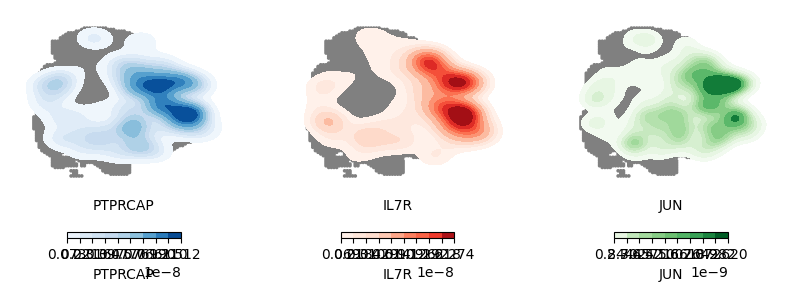

In [51]:
plot_data = fdata[fdata[:, ['CD8A', 'CD8B', 'CD3D', 'CD3E', 'CD3G']].X.toarray().sum(axis=1) > 0, :]

_, ax = plt.subplots(1, 3, figsize=(10, 3.4))
gene_1 = 'PTPRCAP'
gene_2 = 'IL7R'
gene_3 = 'JUN'
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[0], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[1], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[2], marker='o')

sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot1.collections[1], ax=ax[0], orientation='horizontal', label=gene_1, cmap='Blues', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot2.collections[1], ax=ax[1], orientation='horizontal', label=gene_2, cmap='Reds', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_3].X.toarray().flatten(),
            cmap='Greens', ax=ax[2], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot3.collections[1], ax=ax[2], orientation='horizontal', label=gene_3, cmap='Greens', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[2].set_xlabel(gene_3)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()

In [59]:
fdata = load_bgi.load_bin(data_dir + 'COAD_H_001_2022_x/results/SS200000102TR_A1.tissue.gem.gz', 200, 'SS200000102TR_A1')
fdata.write_h5ad('/home/wpy/stereoseq/20240702-Exclusive/RNA/SS200000102TR_A1.gem.h5ad')

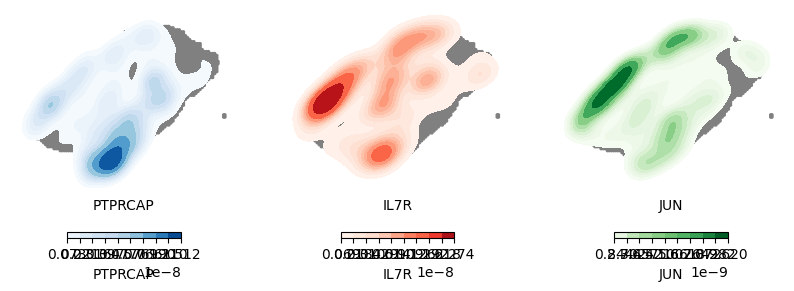

In [61]:
plot_data = fdata[fdata[:, ['CD8A', 'CD8B', 'CD3D', 'CD3E', 'CD3G']].X.toarray().sum(axis=1) > 0, :]

_, ax = plt.subplots(1, 3, figsize=(10, 3.4))
gene_1 = 'PTPRCAP'
gene_2 = 'IL7R'
gene_3 = 'JUN'
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[0], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[1], marker='o')
sns.scatterplot(x=fdata.obsm['spatial'][:, 0], y=fdata.obsm['spatial'][:, 1],
                s=7, c='grey', edgecolor='none',
                alpha=1, ax=ax[2], marker='o')

sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_1].X.toarray().flatten(),
            cmap='Blues', ax=ax[0], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot1.collections[1], ax=ax[0], orientation='horizontal', label=gene_1, cmap='Blues', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_2].X.toarray().flatten(),
            cmap='Reds', ax=ax[1], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot2.collections[1], ax=ax[1], orientation='horizontal', label=gene_2, cmap='Reds', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.kdeplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
            weights=plot_data[:, gene_3].X.toarray().flatten(),
            cmap='Greens', ax=ax[2], alpha=1, fill=True, bw_adjust=0.6)
plt.colorbar(kdeplot3.collections[1], ax=ax[2], orientation='horizontal', label=gene_3, cmap='Greens', shrink=0.5)
cbar.ax.tick_params(labelsize=10)
sns.despine(left=True, bottom=True)
ax[0].set_xlabel(gene_1)
ax[1].set_xlabel(gene_2)
ax[2].set_xlabel(gene_3)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240702-Exclusive/plots/spatial_01.pdf', bbox_inches='tight')
plt.show()